# Uncertainty propagation

We show how to conduct uncertainty propagation for the **EOQ** model. We can simply import the core function from `temfpy`.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import chaospy as cp

from temfpy.uncertainty_quantification import eoq_model

## Setup

We specify a uniform distribution centered around $\mathbf{x^0}=(M, C, S) = (1230, 0.0135, 2.15)$ and spread the support 10% above and below the center.

In [2]:
marginals = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    marginals.append(cp.Uniform(lower, upper))

## Independent parameters

 We now construct a joint distribution for the the independent input parameters and draw a sample of $1,000$ random samples.

In [3]:
distribution = cp.J(*marginals)
sample = distribution.sample(10000, rule="random")

The briefly inspect the joint distribution of $M$ and $C$.

In [4]:
def plot_joint(sample):
    m, c, s = sample

    g = sns.jointplot(m, c, kind="hex")
    g.set_axis_labels(r"$M$", r"$C$")

    g.ax_joint.get_xaxis().set_major_formatter(
        mpl.ticker.StrMethodFormatter("{x:,.0f}")
    )

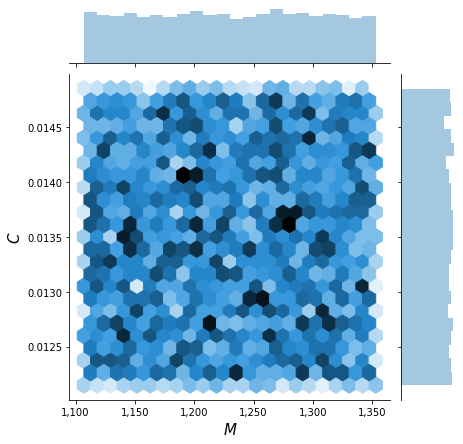

In [5]:
plot_joint(sample)

We are now ready to compute the optimal economic order quantity for each draw.

In [6]:
y = eoq_model(sample)

This results in the following distribution $f_{Y}$.

In [7]:
def plot_quantity(y):
    fig, ax = plt.subplots()

    sns.distplot(y, ax=ax)

    ax.set_xlabel(r"$Y$")
    ax.set_ylabel(r"$f_Y$")

    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
    ax.axes.get_yaxis().set_ticklabels([])

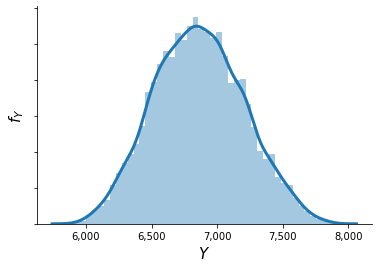

In [8]:
plot_quantity(y)

## Depdendent paramters

We now consider dependent parameters and construct their joint distribution using a Gaussian copula.

In [9]:
corr = [[1.0, 0.6, 0.2], [0.6, 1.0, 0.0], [0.2, 0.0, 1.0]]
copula = cp.Nataf(distribution, corr)

We are ready to sample from the distribution.

In [10]:
sample = copula.sample(10000, rule="random")

Again, we briefly inspect the joint distribution which now clearly shows a dependence pattern.

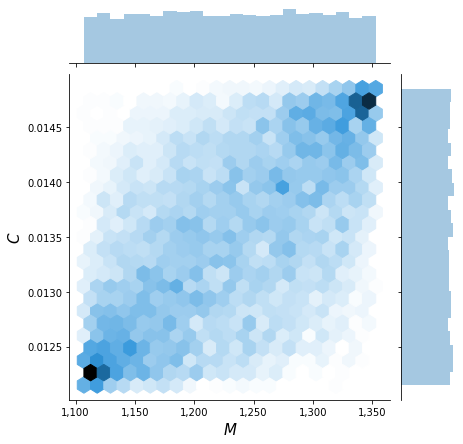

In [11]:
plot_joint(sample)

In [12]:
y = eoq_model(sample)

This now results in a distribution of $f_{Y}$ where the peak is flattened out.

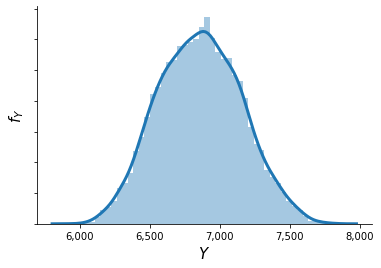

In [13]:
plot_quantity(y)